Figure 2: Wind stress cntrl, anomaly and curl.

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
#import seawater as sw
from mpl_toolkits.axes_grid1 import make_axes_locatable


Populating the interactive namespace from numpy and matplotlib


In [2]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data3/hh5/tmp/pas561/gfdl_nyf_1080/mom025_ocean_grid.nc'
vgrid_file ='/g/data3/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra501-520.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
#print geolon_t.shape

fh=fcor/ht
#print fh.shape

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print st_ocean.shape
#print potrho.shape
#print yt_ocean.shape


In [3]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
#print (xr.__version__)

In [4]:
NP_CntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
Ocean_File = os.path.join(NP_CntrlDir,'Tdim_output197*/ocean__*.nc')
#print Ocean_File
o_np_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
#print o_np_cntrl.temp.shape

#this has 3 years of a wind perturbation - get a nice 3 year polynya.
Ocean_File = os.path.join(NP_CntrlDir,'Tdim_output197*/ocean_force*.nc')
#print Ocean_File
of_np_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
#print of_np_cntrl.tau_x.shape

#this has 3 years of a wind perturbation - get a nice 3 year polynya.
#Ocean_File = os.path.join(NP_CntrlDir,'Tdim_output197*/ice__*.nc')
#print Ocean_File
#i_np_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
#print i_np_cntrl.HI.shape


NoNP_CntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
Ocean_File = os.path.join(NoNP_CntrlDir,'output197*/ocean__*.nc')
#print Ocean_File
o_nonp_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
#print o_nonp_cntrl.temp.shape

#this has 3 years of a wind perturbation - get a nice 3 year polynya.
Ocean_File = os.path.join(NoNP_CntrlDir,'output197*/ocean_force*.nc')
#print Ocean_File
of_nonp_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
#print of_nonp_cntrl.tau_x.shape

#this has 3 years of a wind perturbation - get a nice 3 year polynya.
#Ocean_File = os.path.join(NoNP_CntrlDir,'output197*/ice__*.nc')
#print Ocean_File
#i_nonp_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
#print i_nonp_cntrl.HI.shape

In [5]:
NP_PertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'
Ocean_File = os.path.join(NP_PertDir,'output197*/ocean_force*.nc')
##print Ocean_File
of_np_pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
#print of_np_pert.tau_x.shape

In [6]:
#calculate Ekman pumping anomaly
t=36
#print of_np_cntrl.tau_x.shape
cntrl_Txf=of_np_cntrl.tau_x[0:t,:,:].mean('time').load()/fcor
cntrl_Tyf=of_np_cntrl.tau_y[0:t,:,:].mean('time').load()/fcor
#print cntrl_Txf.shape

#print(np.asscalar(dxt).shape)

cntrl_dTyfdx=np.gradient(cntrl_Tyf,dxt,axis=1)
#print cntrl_dTyfdx.shape
cntrl_dTxfdy=np.gradient(cntrl_Txf,dyt,axis=0)
#print cntrl_dTxfdy.shape

rho0=1035.0
cntrl_we=(cntrl_dTyfdx-cntrl_dTxfdy)/rho0


#print of_np_pert.tau_x.shape
pert_Txf=of_np_pert.tau_x[0:t,:,:].mean('Time').load()/fcor
pert_Tyf=of_np_pert.tau_y[0:t,:,:].mean('Time').load()/fcor
#print pert_Tyf.shape

pert_dTyfdx=np.gradient(pert_Tyf,dxt,axis=1)
#print pert_dTyfdx.shape
pert_dTxfdy=np.gradient(pert_Txf,dyt,axis=0)
#print pert_dTxfdy.shape

rho0=1035.0
pert_we=(pert_dTyfdx-pert_dTxfdy)/rho0

/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


ValueError: distances must be either scalars or 1d

In [ ]:
#nan and unit conversion of Ekman pumping

m=np.nanmax(cntrl_we[0:300,:])
print m
m=np.nanmin(cntrl_we[0:300,:])
print m

m=np.nanmax(pert_we[0:300,:])
print m
m=np.nanmin(pert_we[0:300,:])
print m

#convert from m/s to m/day
s_day=60*60*24
print s_day
cntrl_we=cntrl_we*s_day
pert_we=pert_we*s_day

m=np.nanmax(cntrl_we[0:300,:])
print m
m=np.nanmin(cntrl_we[0:300,:])
print m

m=np.nanmax(pert_we[0:300,:])
print m
m=np.nanmin(pert_we[0:300,:])
print m


In [ ]:
#fill missing numbers with nans
tst=of_np_cntrl.tau_x[0:12].mean('time').load()
print 'tst', tst[50:150,1276]
print tst.shape

#mask area_t for land cells.
msk=np.zeros((kmt.shape[0],kmt.shape[1]),dtype=float)
msk.fill(np.nan)
msk[np.where(kmt>=1)]=1
#print msk.shape
tst=tst*msk
print 'tst', tst[50:150,1276]


print pert_we[50:150,1276]


NameError: name 'msk' is not defined

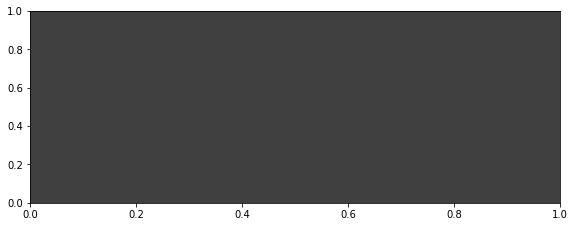

In [7]:
#first 3 panels tx cntrl, 1973-1976 anom, ekman pumping anom
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.2,.21,.01)
clev3 = np.arange(0,5000,1000)


plt.subplot(311)
plt.gca().patch.set_color('.25')
p1=plt.contourf(xt_ocean,yt_ocean,of_np_cntrl.tau_x.mean('time').load()*msk,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$N/m^2$')
clev3 = np.arange(0,5000,1000)
plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylabel('Latitude ($^\circ$)')
plt.ylim((-75,-55))
plt.yticks([-75, -70, -65, -60, -55])
#plt.xlabel('Longitude ($^\circ$)')
plt.xlim([-65,40])
plt.xticks([-60, -40, -20, 0, 20, 40])
plt.title('a) NYF 10yr Control Zonal Wind Stress')

plt.subplot(312)
plt.gca().patch.set_color('.25')
p1=plt.contourf(xt_ocean,yt_ocean,(of_np_pert.tau_x[0:36].mean('Time').load()-of_np_cntrl.tau_x[0:3].mean('time').load())*msk,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$N/m^2$')
clev3 = np.arange(0,5000,1000)
plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylabel('Latitude ($^\circ$)')
plt.ylim((-75,-55))
plt.yticks([-75, -70, -65, -60, -55])
#plt.xlabel('Longitude ($^\circ$)')
plt.xlim([-65,40])
plt.xticks([-60, -40, -20, 0, 20, 40])
#plt.title('1973-1975 Zonal Wind Stress Anomaly')
plt.title('b) 1973-75 Wind Stress Anom.')


clev = np.arange(-.4,.402,.02)
plt.subplot(313)
plt.gca().patch.set_color('.25')
p1=plt.contourf(xt_ocean,yt_ocean,pert_we-cntrl_we,cmap=plt.cm.PiYG,levels=clev,extend='both')
#p1=plt.contourf(xt_ocean,yt_ocean,of_np_pert.tau_x[0:3].mean('Time').load()-of_np_cntrl.tau_x[0:3].mean('time').load(),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('cm/s')
clev3 = np.arange(0,5000,1000)
plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylabel('Latitude ($^\circ$)')
plt.ylim((-75,-55))
plt.yticks([-75, -70, -65, -60, -55])
plt.xlabel('Longitude ($^\circ$)')
plt.xlim([-65,40])
plt.xticks([-60, -40, -20, 0, 20, 40])
#plt.title('1973-1975 Zonal Wind Stress Anomaly')
plt.title('c) 1973-75 Ekman Pump. Anom.')


plt.tight_layout()

of = '/g/data1/v45/pas561/mom/archive/wp2_figs/Fig2_Taux.png'
plt.savefig(of,dpi=220)

In [ ]:
#Do JRA time series of u_10
CntrlDir = '/g/data1/v45/pas561/mom/archive/jra/'
of=os.path.join(CntrlDir,'jra_area.npy')
jra_a=np.load(of)
print jra_a.shape,np.sum(jra_a)

hgrid_file ='/g/data1/v45/pas561/mom/archive/jra/u_10.2017.18Oct2017.ncra.nc'
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
latitude = nc.variables['latitude'][:]
longitude = nc.variables['longitude'][:]
nc.close() # close the file

#wind speed
Ocean_File = os.path.join(CntrlDir,'*ncra.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.uas_10m.shape
jra_u10=ff.uas_10m.load()
#jra_v10=ff.vas_10m.load()

yrs=np.arange(1958,2018,1)
i_yr=12
print yrs[i_yr]
print yrs.shape

#ltm from 1970-2017
t1=i_yr
t2=60
jra_ltm_u10=np.mean(jra_u10[t1:t2,:,:],axis=0)
#jra_ltm_v10=np.mean(jra_v10[t1:t2,:,:],axis=0)
print jra_ltm_u10.shape

#area averaging
x1=np.argwhere(longitude>0) 
x2=np.argwhere(longitude>20)
x1=x1[0]
x2=x2[0]
print "xs ",x1,x2,longitude[x1:x2], longitude.shape

y1=np.argwhere(latitude>-70) #-60
y2=np.argwhere(latitude>-57)#was going to -15 but woa o2 data resets at 0
y1=y1[0]
y2=y2[0]
print "ys ",y1,y2,latitude[y1:y2], latitude.shape

jra_msk=np.zeros((jra_a.shape[0],jra_a.shape[1]),)
print "mask", jra_msk.shape
#imshow(msk)
jra_msk[y1:y2,x1:x2]=1.0

jra_u_10_wp2_ts=np.zeros((t2-t1,1),)
for yr in range(t1,t2):   
    #print yrs[yr]
    jra_u_10_wp2_ts[yr-t1]=np.sum((jra_u10[yr,:,:]-jra_ltm_u10)*jra_msk*jra_a)/np.sum(jra_msk*jra_a)
    #jra_u_10_wp2_ts[yr-t1]=np.sum((jra_u10[yr,:,:])*msk*jra_a)/np.sum(msk*jra_a)

jra_u_10_wp2_ltm=np.sum(jra_ltm_u10[:,:]*jra_msk*jra_a)/np.sum(jra_msk*jra_a)

#print yrs[i_yr:]                       
#print "jra wp2 mean: ", jra_u_10_wp2_ltm
#print "jra wp2: ", jra_u_10_wp2_ts[:]

print "nyf wp2 mean and anom:  1.36691101921 2.80175987877"

plt.subplot(211)
plt.plot(yrs[t1:t2],jra_u_10_wp2_ts,linestyle='-',color='g',label='JRA',linewidth=1.5)
#plt.plot([1970,2017],[1.367,1.367],linestyle='-',color='b',label='CORE-NYF',linewidth=1)
plt.plot([1973,1974,1975],[2.80,2.80,2.80],linestyle='-',marker='o',color='b',label='Perturbation',linewidth=1)
plt.plot([1970,2017],[0,0],linestyle=':',color='k',linewidth=1)

plt.fill_between([1974,1975,1976], 3, -3,facecolor='grey')
plt.fill_between([1979.5,1980.5], 3, -3,facecolor='grey')
plt.fill_between([1981.5,1982.5], 3, -3,facecolor='grey')
plt.fill_between([1990.5,1992.5], 3, -3,facecolor='grey')
plt.fill_between([1993.5,1994.5], 3, -3,facecolor='grey')
plt.fill_between([1999.5,2002.5], 3, -3,facecolor='grey')
plt.fill_between([2003.5,2005.5], 3, -3,facecolor='grey')
plt.fill_between([2015.5,2017.5], 3, -3,facecolor='grey')

plt.ylabel('Zonal Wind Anom. (m/s)')
plt.xlabel('Years')
plt.xlim([1970,2017])
plt.xticks([1970,1975,1980,1985,1990,1995,2000,2005,2010,2015])
plt.ylim([-2,3])
plt.yticks([-2,-1,0,1,2,3])
#tit=('Drake Passage Transport')
#plt.title(tit)
plt.legend(fontsize=10)

#of = '/g/data1/v45/pas561/mom/archive/wp2_figs/Fig2_U10.png'
#plt.savefig(of,dpi=220)

In [8]:
#extract the model grid info
u_file ='/g/data/v45/pas561/mom/input/u_10.ncra.nc'

# Extract the variables
nc = Dataset(u_file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
nyf_u_10 = nc.variables['U_10_MOD'][:]
nc.close() # close the file

u_file ='/g/data/v45/pas561/mom/input/wedpolywinds/u_10.30Sup15shift4.indo.v4.ncra.nc'

# Extract the variables
nc = Dataset(u_file, mode='r') # file handle, open in read only mode
pert_u_10 = nc.variables['U_10_MOD'][:]
nc.close() # close the file
print pert_u_10.shape





IOError: [Errno 2] No such file or directory: '/g/data1/v45/pas561/mom/input/u_10.ncra.nc'

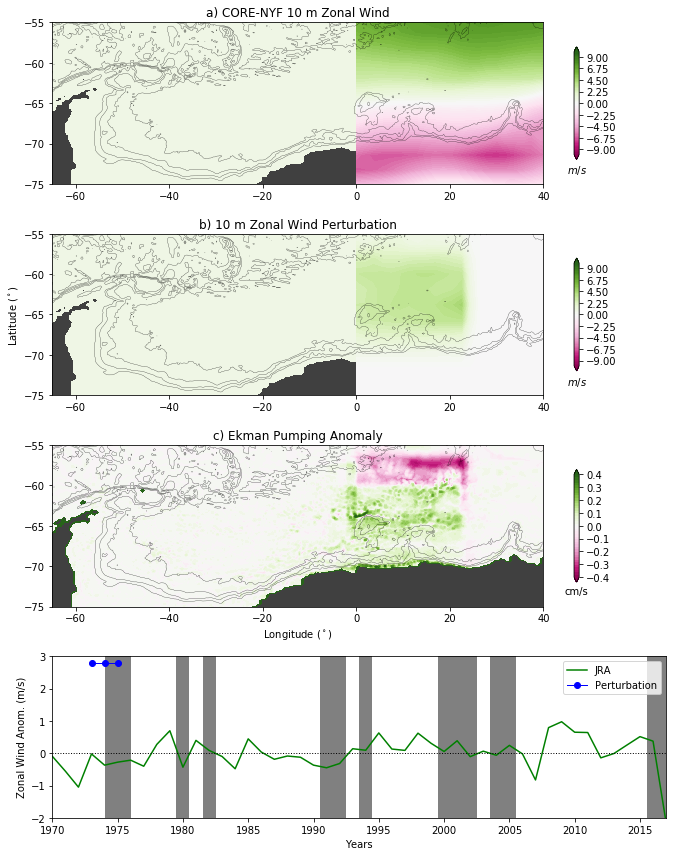

In [12]:
#first 3 panels u_10 cntrl, u_10 anom, ekman pumping anom, jra time-series
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-10,10.25,.25)
#print clev
clev3 = np.arange(0,5000,1000)

plt.subplot(411)
plt.gca().patch.set_color('.25')
p2=plt.contourf(xt_ocean,yt_ocean,msk,cmap=plt.cm.PiYG,levels=clev,extend='both')
p1=plt.contourf(lon,lat,nyf_u_10[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$m/s$')
clev3 = np.arange(0,5000,1000)
plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylabel('Latitude ($^\circ$)')
plt.ylim((-75,-55))
plt.yticks([-75, -70, -65, -60, -55])
#plt.xlabel('Longitude ($^\circ$)')
plt.xlim([-65,40])
plt.xticks([-60, -40, -20, 0, 20, 40])
plt.title('a) CORE-NYF 10 m Zonal Wind')

plt.subplot(412)
plt.gca().patch.set_color('.25')
p2=plt.contourf(xt_ocean,yt_ocean,msk,cmap=plt.cm.PiYG,levels=clev,extend='both')
p1=plt.contourf(lon,lat,(pert_u_10-nyf_u_10)[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$m/s$')
clev3 = np.arange(0,5000,1000)
plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylabel('Latitude ($^\circ$)')
plt.ylim((-75,-55))
plt.yticks([-75, -70, -65, -60, -55])
#plt.xlabel('Longitude ($^\circ$)')
plt.xlim([-65,40])
plt.xticks([-60, -40, -20, 0, 20, 40])
#plt.title('1973-1975 Zonal Wind Stress Anomaly')
plt.title('b) 10 m Zonal Wind Perturbation')


clev = np.arange(-.4,.402,.02)
plt.subplot(413)
plt.gca().patch.set_color('.25')
p2=plt.contourf(xt_ocean,yt_ocean,msk,cmap=plt.cm.PiYG,levels=clev,extend='both')
p1=plt.contourf(xt_ocean,yt_ocean,pert_we-cntrl_we,cmap=plt.cm.PiYG,levels=clev,extend='both')
#p1=plt.contourf(xt_ocean,yt_ocean,of_np_pert.tau_x[0:3].mean('Time').load()-of_np_cntrl.tau_x[0:3].mean('time').load(),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('cm/s')
clev3 = np.arange(0,5000,1000)
plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylabel('Latitude ($^\circ$)')
plt.ylim((-75,-55))
plt.yticks([-75, -70, -65, -60, -55])
plt.xlabel('Longitude ($^\circ$)')
plt.xlim([-65,40])
plt.xticks([-60, -40, -20, 0, 20, 40])
#plt.title('1973-1975 Zonal Wind Stress Anomaly')
plt.title('c) Ekman Pumping Anomaly')


plt.subplot(414)
plt.plot(yrs[t1:t2],jra_u_10_wp2_ts,linestyle='-',color='g',label='JRA',linewidth=1.5)
#plt.plot([1970,2017],[1.367,1.367],linestyle='-',color='b',label='CORE-NYF',linewidth=1)
plt.plot([1973,1974,1975],[2.80,2.80,2.80],linestyle='-',marker='o',color='b',label='Perturbation',linewidth=1)
plt.plot([1970,2017],[0,0],linestyle=':',color='k',linewidth=1)

plt.fill_between([1974,1976], 3, -3,facecolor='grey')
plt.fill_between([1979.5,1980.5], 3, -3,facecolor='grey')
plt.fill_between([1981.5,1982.5], 3, -3,facecolor='grey')
plt.fill_between([1990.5,1992.5], 3, -3,facecolor='grey')
plt.fill_between([1993.5,1994.5], 3, -3,facecolor='grey')
plt.fill_between([1999.5,2002.5], 3, -3,facecolor='grey')
plt.fill_between([2003.5,2005.5], 3, -3,facecolor='grey')
plt.fill_between([2015.5,2017.5], 3, -3,facecolor='grey')

plt.ylabel('Zonal Wind Anom. (m/s)')
plt.xlabel('Years')
plt.xlim([1970,2017])
plt.xticks([1970,1975,1980,1985,1990,1995,2000,2005,2010,2015])
plt.ylim([-2,3])
plt.yticks([-2,-1,0,1,2,3])
#tit=('Drake Passage Transport')
#plt.title(tit)
plt.legend(fontsize=10)

plt.tight_layout()

#of = '/g/data1/v45/pas561/mom/archive/wp2_figs/Fig2_U10.png'
#plt.savefig(of,dpi=220)



In [29]:
#print xt_ocean

#re-arrange lon from -180 to 180
print lon
lon_2=lon.copy()
print lon_2.shape

lon_2[96:192]=lon[0:96]
lon_2[0:96]=lon[96:192]-360

print lon_2

nyf_u_10_v2=nyf_u_10.copy()
nyf_u_10_v2[0,:,96:192]=nyf_u_10[0,:,0:96]
nyf_u_10_v2[0,:,0:96]=nyf_u_10[0,:,96:192]

pert_u_10_v2=pert_u_10.copy()
pert_u_10_v2[0,:,96:192]=pert_u_10[0,:,0:96]
pert_u_10_v2[0,:,0:96]=pert_u_10[0,:,96:192]


#for i in range(0,lon.shape[0]):   
#create msk from model     
print msk.shape
print msk[:,100]

#mask jra area with model land cells.
#mask area_t for land cells.
msk=np.zeros((kmt.shape[0],kmt.shape[1]),dtype=float)
msk.fill(1)
msk[np.where(kmt>=1)]=np.nan
#print msk.shape

print msk[:,100]
#print 'tst', tst[50:150,1276]


[   0.       1.875    3.75     5.625    7.5      9.375   11.25    13.125
   15.      16.875   18.75    20.625   22.5     24.375   26.25    28.125
   30.      31.875   33.75    35.625   37.5     39.375   41.25    43.125
   45.      46.875   48.75    50.625   52.5     54.375   56.25    58.125
   60.      61.875   63.75    65.625   67.5     69.375   71.25    73.125
   75.      76.875   78.75    80.625   82.5     84.375   86.25    88.125
   90.      91.875   93.75    95.625   97.5     99.375  101.25   103.125
  105.     106.875  108.75   110.625  112.5    114.375  116.25   118.125
  120.     121.875  123.75   125.625  127.5    129.375  131.25   133.125
  135.     136.875  138.75   140.625  142.5    144.375  146.25   148.125
  150.     151.875  153.75   155.625  157.5    159.375  161.25   163.125
  165.     166.875  168.75   170.625  172.5    174.375  176.25   178.125
  180.     181.875  183.75   185.625  187.5    189.375  191.25   193.125
  195.     196.875  198.75   200.625  202.5    204.

[ 0.  1.]


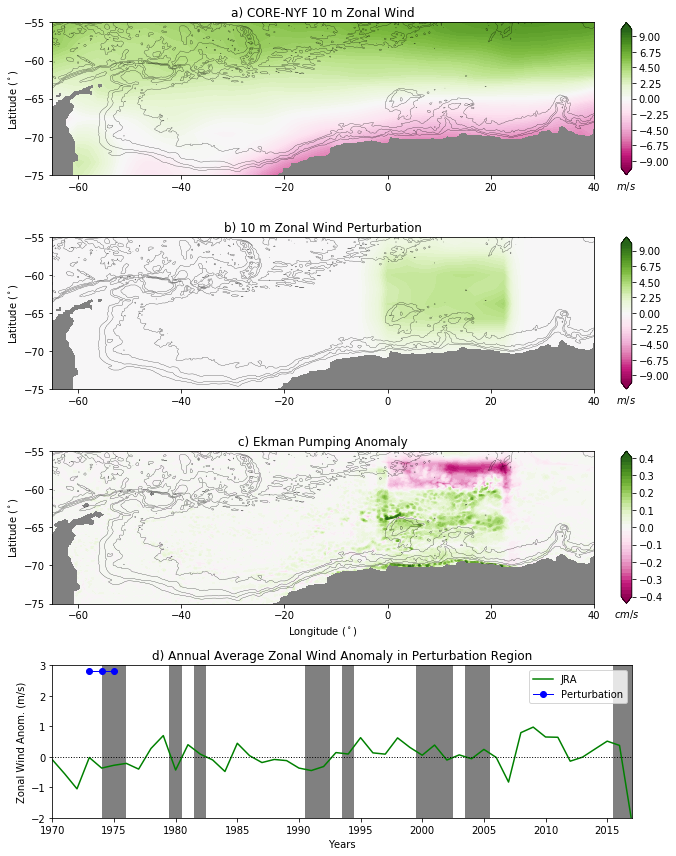

In [34]:
plt.rcParams['font.size'] = 12

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-10,10.25,.25)
#print clev
clev2 = np.arange(0,1.1,1)
print clev2

clev3 = np.arange(0,5000,1000)

plt.subplot(411)
plt.gca().patch.set_color('.25')
p1=plt.contourf(lon_2,lat,nyf_u_10_v2[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
p2=plt.contourf(xt_ocean,yt_ocean,msk,cmap=plt.cm.gray,levels=clev2)
clev3 = np.arange(0,5000,1000)
plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylabel('Latitude ($^\circ$)')
plt.ylim((-75,-55))
plt.yticks([-75, -70, -65, -60, -55])
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.xlim([-65,40])
plt.xticks([-60, -40, -20, 0, 20, 40])
plt.title('a) CORE-NYF 10 m Zonal Wind')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical')
cb.ax.set_xlabel('$m/s$')


plt.subplot(412)
plt.gca().patch.set_color('.25')
p2=plt.contourf(xt_ocean,yt_ocean,msk,cmap=plt.cm.PiYG,levels=clev,extend='both')
p1=plt.contourf(lon_2,lat,(pert_u_10_v2-nyf_u_10_v2)[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
p2=plt.contourf(xt_ocean,yt_ocean,msk,cmap=plt.cm.gray,levels=clev2)
clev3 = np.arange(0,5000,1000)
plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylabel('Latitude ($^\circ$)')
plt.ylim((-75,-55))
plt.yticks([-75, -70, -65, -60, -55])
plt.xlabel('Longitude ($^\circ$)')
plt.xlim([-65,40])
plt.xticks([-60, -40, -20, 0, 20, 40])
#plt.title('1973-1975 Zonal Wind Stress Anomaly')
plt.title('b) 10 m Zonal Wind Perturbation')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical')
cb.ax.set_xlabel('$m/s$')


clev = np.arange(-.4,.402,.02)
plt.subplot(413)
plt.gca().patch.set_color('.5')
#p2=plt.contourf(xt_ocean,yt_ocean,msk,cmap=plt.cm.PiYG,levels=clev,extend='both')
p1=plt.contourf(xt_ocean,yt_ocean,pert_we-cntrl_we,cmap=plt.cm.PiYG,levels=clev,extend='both')
#p1=plt.contourf(xt_ocean,yt_ocean,of_np_pert.tau_x[0:3].mean('Time').load()-of_np_cntrl.tau_x[0:3].mean('time').load(),cmap=plt.cm.PiYG,levels=clev,extend='both')
clev3 = np.arange(0,5000,1000)
plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylabel('Latitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.ylim((-75,-55))
plt.yticks([-75, -70, -65, -60, -55])
plt.xlabel('Longitude ($^\circ$)')
plt.xlim([-65,40])
plt.xticks([-60, -40, -20, 0, 20, 40])
#plt.title('1973-1975 Zonal Wind Stress Anomaly')
plt.title('c) Ekman Pumping Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical')
cb.ax.set_xlabel('$cm/s$')

plt.subplot(414)
plt.plot(yrs[t1:t2],jra_u_10_wp2_ts,linestyle='-',color='g',label='JRA',linewidth=1.5)
#plt.plot([1970,2017],[1.367,1.367],linestyle='-',color='b',label='CORE-NYF',linewidth=1)
plt.plot([1973,1974,1975],[2.80,2.80,2.80],linestyle='-',marker='o',color='b',label='Perturbation',linewidth=1)
plt.plot([1970,2017],[0,0],linestyle=':',color='k',linewidth=1)

plt.fill_between([1974,1976], 3, -3,facecolor='grey')
plt.fill_between([1979.5,1980.5], 3, -3,facecolor='grey')
plt.fill_between([1981.5,1982.5], 3, -3,facecolor='grey')
plt.fill_between([1990.5,1992.5], 3, -3,facecolor='grey')
plt.fill_between([1993.5,1994.5], 3, -3,facecolor='grey')
plt.fill_between([1999.5,2002.5], 3, -3,facecolor='grey')
plt.fill_between([2003.5,2005.5], 3, -3,facecolor='grey')
plt.fill_between([2015.5,2017.5], 3, -3,facecolor='grey')

plt.ylabel('Zonal Wind Anom. (m/s)')
plt.xlabel('Years')
plt.xlim([1970,2017])
plt.xticks([1970,1975,1980,1985,1990,1995,2000,2005,2010,2015])
plt.ylim([-2,3])
plt.yticks([-2,-1,0,1,2,3])
tit=('d) Annual Average Zonal Wind Anomaly in Perturbation Region')
plt.title(tit)
plt.legend(fontsize=10)

plt.tight_layout()

of = '/g/data1/v45/pas561/mom/archive/wp2_figs/Fig2_U10.png'
plt.savefig(of,dpi=220)


(1080, 1440)
[ nan  nan  nan ...,   1.   1.   1.]
[  1.   1.   1. ...,  nan  nan  nan]
